In [20]:
%matplotlib inline
import happybase
import codecs
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time
import base64

# binary

In [2]:
hbase_connect = happybase.Connection(host='192.168.1.201')

In [3]:
hbase_table = hbase_connect.table('img_test')

In [17]:
t1 = time.time()
with codecs.open('TankScreenShot12122018141243842.png', 'rb',) as f:
    img_binary = f.read()
print ("이미지 바이너리로 읽기", time.time() - t1)

이미지 바이너리로 읽기 0.0017976760864257812


In [5]:
img_cv = cv2.imread('TankScreenShot12122018141243842.png', cv2.IMREAD_COLOR)

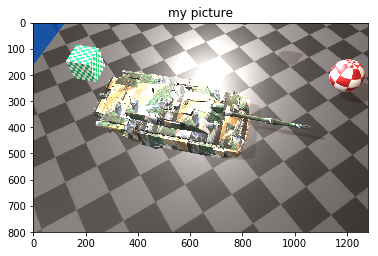

In [6]:
plt.imshow(img_cv)
plt.title('my picture')
plt.show()

In [7]:
hbase_column = {'d:tt': img_binary}

In [8]:
hbase_table.put('test' ,hbase_column)

In [19]:
t1 = time.time()
binary_data = hbase_table.cells('test', 'd:tt')
print ("이미지 HBase에서 가지고 오기", time.time() - t1)

이미지 HBase에서 가지고 오기 0.01338338851928711


In [18]:
t1 = time.time()
with open('HBase_tank.png', 'wb') as f:
    f.write(binary_data[0])
print ("바이너리 이미지로 저장", time.time() - t1)

바이너리 이미지로 저장 0.0031397342681884766


In [11]:
img_hb = cv2.imread('HBase_tank.png', cv2.IMREAD_COLOR)

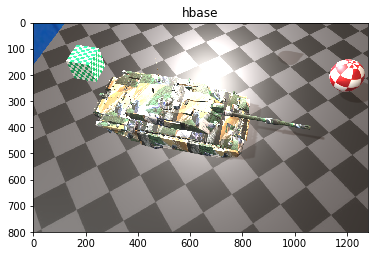

In [12]:
plt.imshow(img_hb)
plt.title('hbase')
plt.show()